In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib
import numpy as np
from datascience import *
from datetime import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

RSF_Table = Table.read_table("scraped_data2.csv")
RSF_Table

Using matplotlib backend: agg


Timestamp,Data
2/13/2023 12:38,1.03
2/13/2023 12:40,1
2/13/2023 12:43,0.98
2/13/2023 12:45,0.98
2/13/2023 12:48,1
2/13/2023 12:50,0.98
2/13/2023 12:53,0.95
2/13/2023 13:41,0.92
2/13/2023 13:42,0.96
2/13/2023 13:45,0.88


In [3]:

def convert_to_datetime(start):
    x =  datetime.strptime(start, "%m/%d/%Y %H:%M") # converts the table to the datetime objects to better manipulate them
    return x

def convert_to_datetime2(start):
    x =  datetime.strptime(start, "%m/%d/%Y %H:%M") # converts the table to the datetime objects to better manipulate them
    return x.strftime('%H:%M')

convert = RSF_Table.apply(convert_to_datetime,'Timestamp')
#new = RSF_Table.apply(convert_to_datetime2,'Timestamp')
RSF_Table = RSF_Table.with_columns('Timestamp', convert).drop('Unnamed: 2').sort('Timestamp',descending = True)
RSF_Table = RSF_Table.where('Data', are.above(.001))
RSF_Table

Timestamp,Data
2023-03-29 20:05:00,0.32
2023-03-29 20:00:00,0.35
2023-03-29 19:55:00,0.36
2023-03-29 19:50:00,0.4
2023-03-29 19:45:00,0.41
2023-03-29 19:40:00,0.4
2023-03-29 19:35:00,0.46
2023-03-29 19:30:00,0.51
2023-03-29 19:25:00,0.53
2023-03-29 19:20:00,0.51


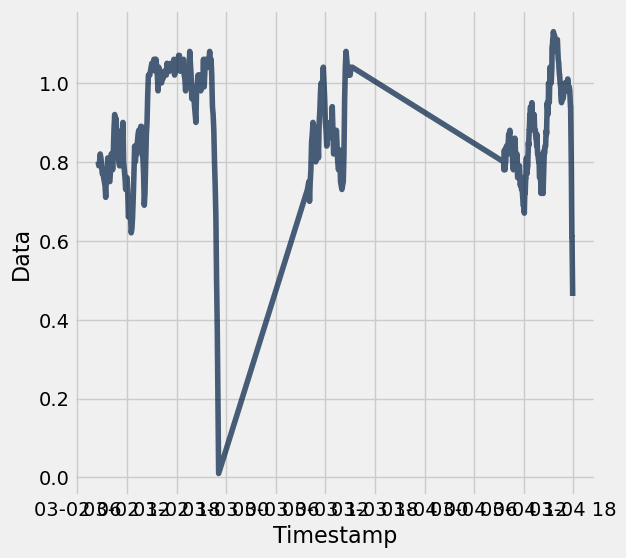

In [4]:
x= datetime(2023, 3, 2, 8, 0)
y = datetime(2023, 3, 4, 18, 0)

RSF_Table2 = RSF_Table.where('Timestamp', are.between(x,y))
RSF_Table2.plot('Timestamp')

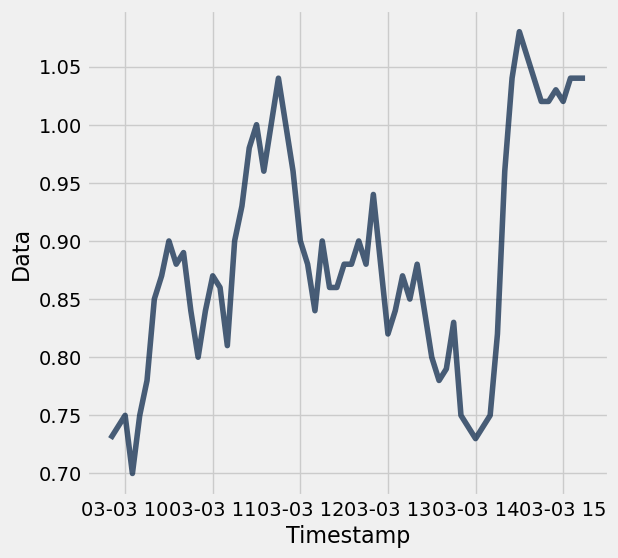

In [6]:
def getHourMinutes(inp):
    return str(inp.hour) + ':'+ str(inp.minute)

x= datetime(2023, 3, 3, 7, 0)
y = datetime(2023, 3, 3, 23, 0)

RSF_Table2 = RSF_Table.where('Timestamp', are.between(x,y))

x = RSF_Table2.apply(getHourMinutes,'Timestamp')
RSF_Table2.plot('Timestamp')

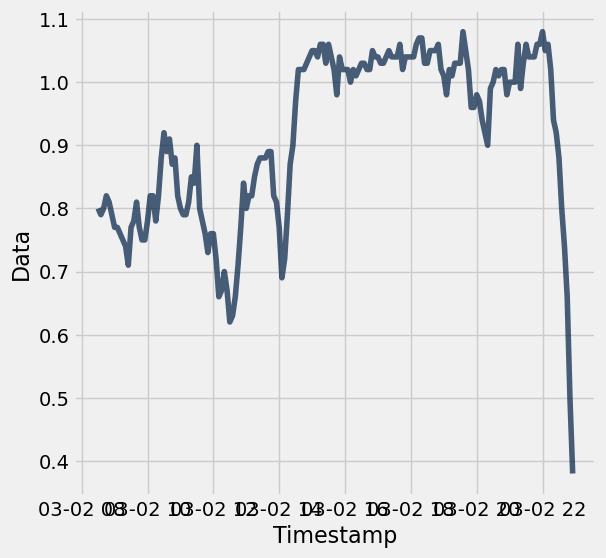

In [7]:
x= datetime(2023, 3, 2, 7, 0)
y = datetime(2023, 3, 2, 23, 0)

RSF_Table2 = RSF_Table.where('Timestamp', are.between(x,y))
RSF_Table2.plot('Timestamp')

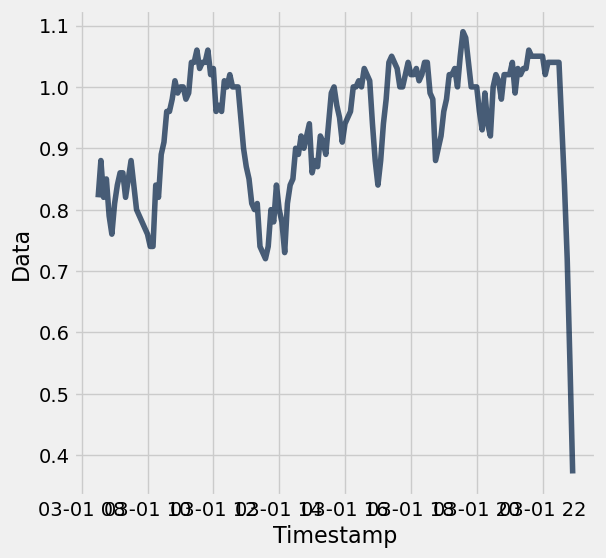

In [8]:
x= datetime(2023, 3, 1, 7, 0)
y = datetime(2023, 3, 1, 23, 0)

RSF_Table2 = RSF_Table.where('Timestamp', are.between(x,y))
RSF_Table2.plot('Timestamp')

In [9]:

def replace_day_of_week(day): # later i use the weekday() from datetime, for formatting purposes I want the day of the week to show on the table
    if day ==0:
        return 'Monday '
    if day ==1:
        return 'Tuesday '
    if day ==2:
        return 'Wednesday '
    if day ==3:
        return 'Thursday '
    if day ==4:
        return 'Friday '
    if day == 5:
        return 'Saturday '
    if day ==6:
        return 'Sunday '
#    

In [10]:
#CHANGE VARIABLES HERE TO SPECIFY TIME: CAHNGE MINUTES_CHANGE to the durration of the gym, and the int under start.hour< int for desired times, right now its under RSF hours but lets say if i didnt want to wake up early I would change the 6 to a 10  



def average_one_hour_ahead(start,minutes_change = 60): #gets the average porportion full for the starting time for another hour 
    if start.hour <22 and start.weekday() != 5 and start.weekday() != 6 and start.hour > 7: # make sure its during rsf hours
        temp = (RSF_Table.where('Timestamp',are.between(start, start + timedelta(minutes = minutes_change))))
        return sum(temp.column('Data'))/temp.num_rows
    if start.hour <17 and start.weekday() == 5 and start.hour > 6: # make sure its during rsf hours
        temp = (RSF_Table.where('Timestamp',are.between(start, start + timedelta(minutes = minutes_change))))
        return sum(temp.column('Data'))/temp.num_rows
    if start.hour <22 and start.weekday() == 6 and start.hour > 7: # make sure its during rsf hours
        temp = (RSF_Table.where('Timestamp',are.between(start, start + timedelta(minutes = minutes_change))))
        return sum(temp.column('Data'))/temp.num_rows
    

In [11]:

average_60_min = [] 
recal = []
for  element  in (RSF_Table.column('Timestamp')): # sets each of the days in the file to recal to recal what the best time was later
    if element.day  not in [ind.day for ind in recal]: 
        recal.append(element)
        average_60_min.append(10000) # default value for each element so that it is easily replacable later

        
for  element  in range(len(recal)): # sets the lowest average time to coordinate with each value in recal
    for element2 in (RSF_Table.column('Timestamp')):
        if element2.day ==recal[element].day and (average_one_hour_ahead(element2)) is not None and (average_one_hour_ahead(element2)) < average_60_min[element]:
            average_60_min[element] = (average_one_hour_ahead(element2))
            recal[element] = element2
            



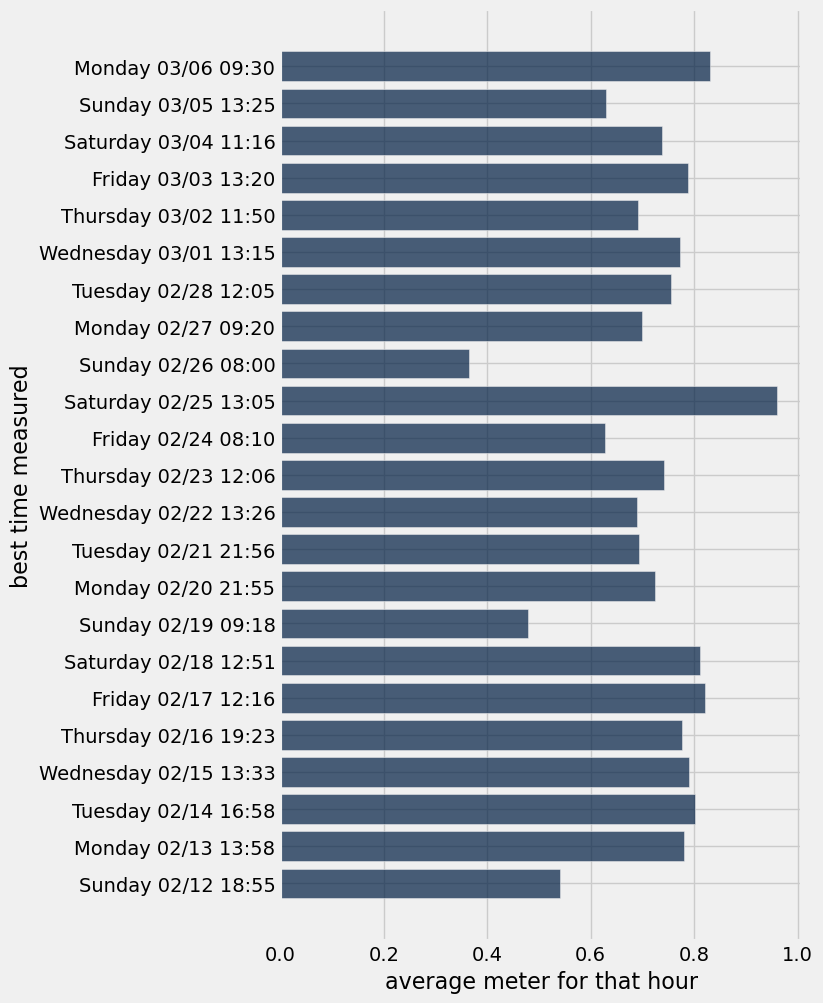

In [12]:
for element in range(len(recal)): # formats the recal array to be more readable with the day of the week and time 
    recal[element] = replace_day_of_week(recal[element].weekday()) + str(recal[element].strftime('%m/%d %H:%M'))
Table().with_columns('best time measured',recal,'average meter for that hour',average_60_min).barh('best time measured', 'average meter for that hour')




